In [1]:
ls

Analyzing Biological Sequences using If Statements and For loops.ipynb
Applications/
Capstone_Analyzing_dinucleotide_usage_in_the_Human_Genome
Class_Work.ipynb
Creative Cloud Files Personal Account abel2003@uw.edu 074C110F61831C8A0A495E7E@AdobeID/
Creative Cloud Files arianabeloiu@gmail.com 48e3dd6f2a9169b283035eefbcc2c67fa070246e165e98ac528780d97f82fc6f/
Desktop/
Documents/
Downloads/
Human_FMR1_Protein_UniProt.fasta
Library/
Mesquite_Support_Files/
Movies/
Music/
Pictures/
Project 1 Work(practice).ipynb
Public/
Reading and writing FASTA files.ipynb
Untitled.ipynb
Zotero/
_
anaconda3/
analyzing_tabular_omics_data_in_pandas
analyzing_tabular_omics_data_in_pandas.ipynb
capstone_cg_dinucleotides.ipynb
combined_coral_data.tsv
combining_and_filtering_data_tables_in_pandas.ipynb
coral_disease_susceptibility.txt
coral_microbiome_diversity.txt
coral_symbiont_abundance.txt
data_vizualization_in_seaborn.ipynb
error_messages_in_python.ipynb
exercise_1_fasta_file.txt
exercise_the_wrath_of_tufte.i

In [2]:
cd Downloads/

/Users/arianabeloiu/Downloads


In [3]:
ls

Circulumn Vitae.docx
Circulumn Vitae.pdf
Images/
Lecture_and_Discussion_Unit_3_Pandas_Microbiome_r30.pptx
SearchTable-2024-03-15 05_33_19.236.tsv
SearchTable-2024-03-15 23_10_23.674.tsv
UWUnofficialTranscript.pdf
W2_2023.pdf
bqab217.pdf
cmv_ebv_sars_cov_2_complete_data.csv
data/
ebv_cmv_sars_cov_2_full_table - Sheet1.csv
ebv_cmv_sars_cov_2_table.csv
ebv_cmv_sars_cov_2_table.xlsx
ebv_sars_cov_2_influenza_a_table.csv
ebv_sars_cov_2_influenza_a_table.xlsx


/Users/arianabeloiu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


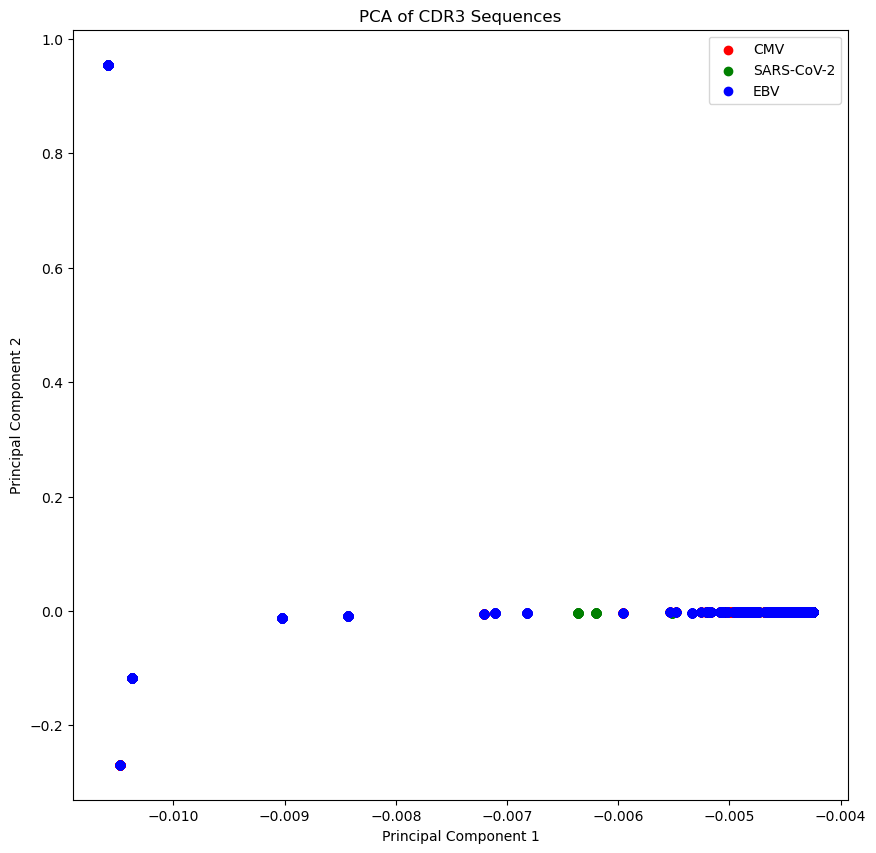

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#load the data
data = pd.read_csv('cmv_ebv_sars_cov_2_complete_data.csv')

#define sequences
sequences = data['CDR3']

#encode the sequences
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(sequences)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

#generate PCA
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(onehot_encoded)

#visualize the results
species = data['Epitope species'] 
plt.figure(figsize=(10, 10))
species_labels = species.unique()
colors = ['r', 'g', 'b']  # Assigning colors to each species
for species_label, color in zip(species_labels, colors):
    plt.scatter(pca_result[species == species_label, 0], pca_result[species == species_label, 1], c=color, label=species_label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of CDR3 Sequences')
plt.show()